<center><h2> Example on how to use Filters class from msdLib</h2></center>

In [1]:
# importing all necessary dependencies
from msdlib import msd
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sounddevice as sd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# loading example wav file
fs, data = wavfile.read('example_tone_001.wav')
print(fs)
# converting stereo audio data into pandas dataframe
data = pd.DataFrame(data, columns = ['stereo_1', 'stereo_2'])
data.index /= fs
data

48000


,stereo_1,stereo_2
0.000000,0,0
0.000021,0,0
0.000042,0,0
0.000063,0,0
0.000083,0,0
0.000104,0,0
0.000125,0,0
0.000146,0,0
0.000167,0,0
0.000188,0,0


In [3]:
# playing the sound
sd.play(data['stereo_1'], fs)
sd.wait()

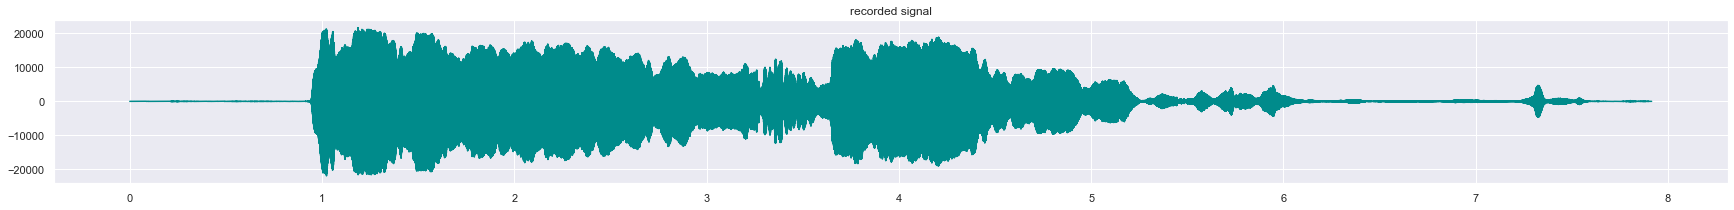

In [4]:
# plotting the time series data
fig, ax = plt.subplots(figsize = (30, 3))
ax.plot(data['stereo_1'], color = 'darkcyan')
ax.set_title('recorded signal')
plt.show()

### Filters() example

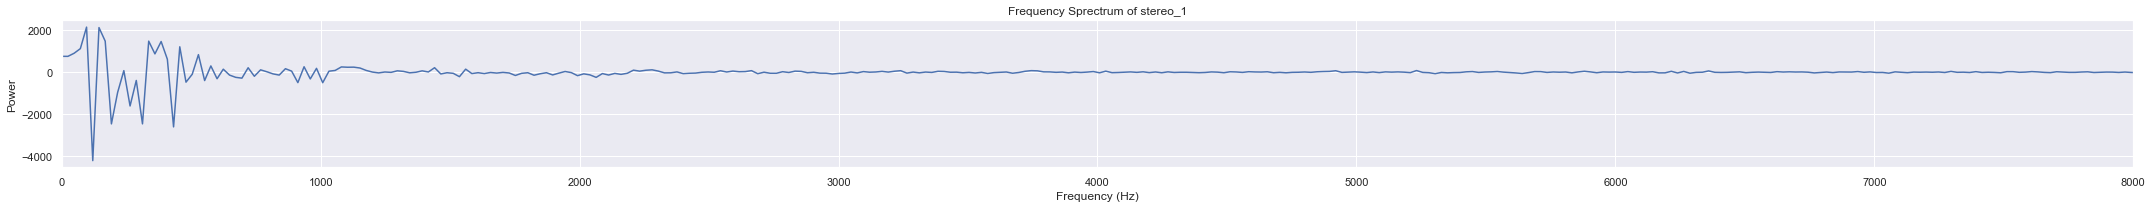

In [5]:
key = 'stereo_1'
# filter definition
filt = msd.Filters(1/fs, N = 1000)
# visualizing frequency domain spectrum of the time series
filt.vis_spectrum(data[key], f_lim = [0, 8000], see_neg = False, show = True, save = False, savepath = '',figsize = (30, 3))

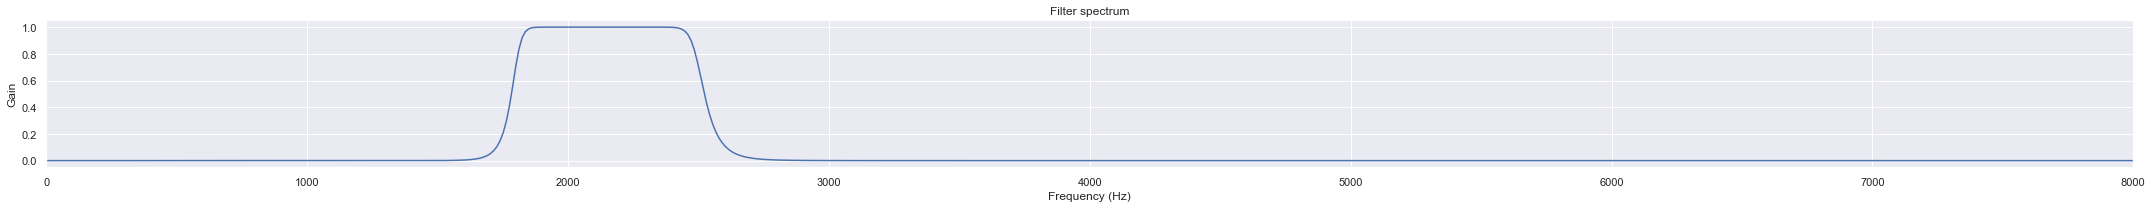

In [6]:
# applying band pass filter of cut offs 1800 - 2500 Hz and visualizing filter's spectrum
y = filt.apply(data[key], filt_type = 'bp', f_cut = [1800, 2500], order = 10, response = True, plot = False, f_lim = [0, 8000])

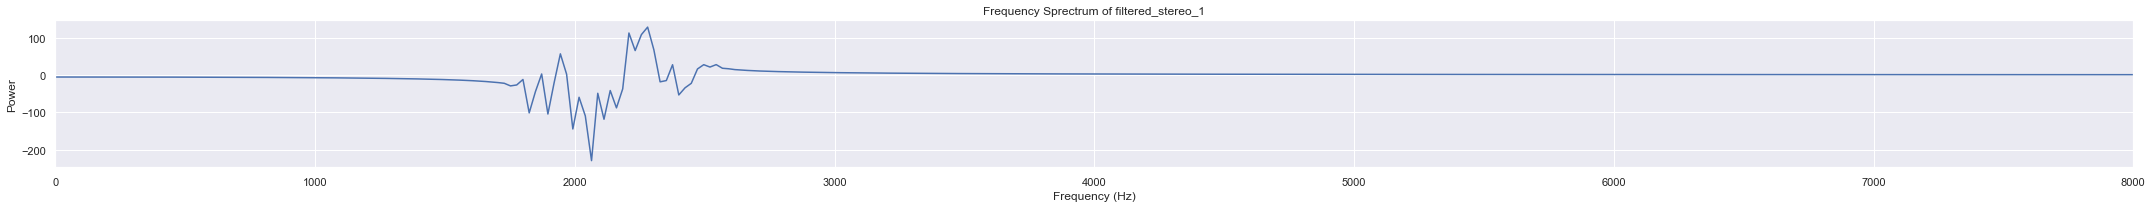

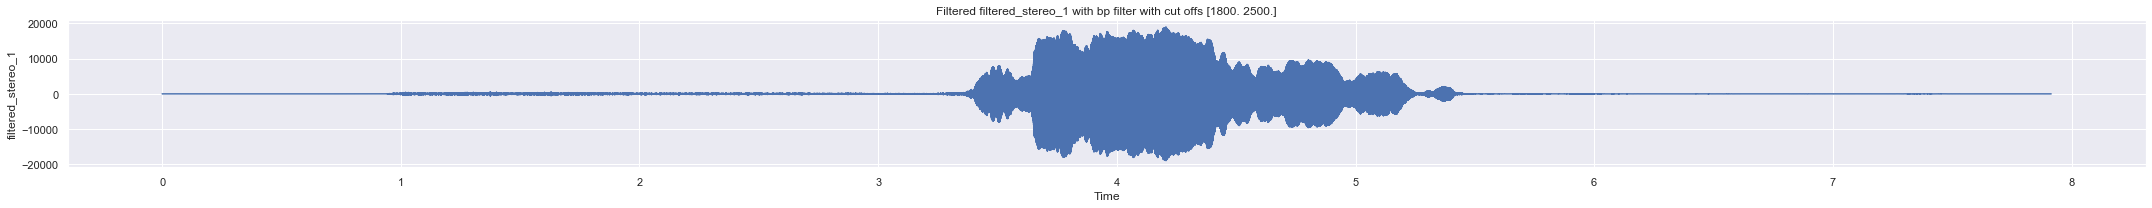

In [7]:
# applying band pass filter of cut offs 1800 - 2500 Hz and visualizing the filtered signal's spectrum and time series plot
y = filt.apply(data[key], filt_type = 'bp', f_cut = [1800, 2500], order = 10, response = False, plot = True, f_lim = [0, 8000])

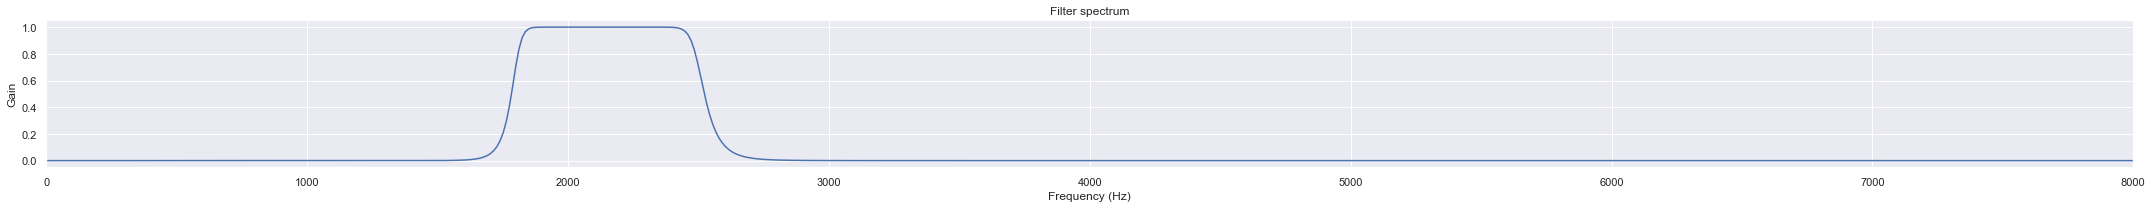

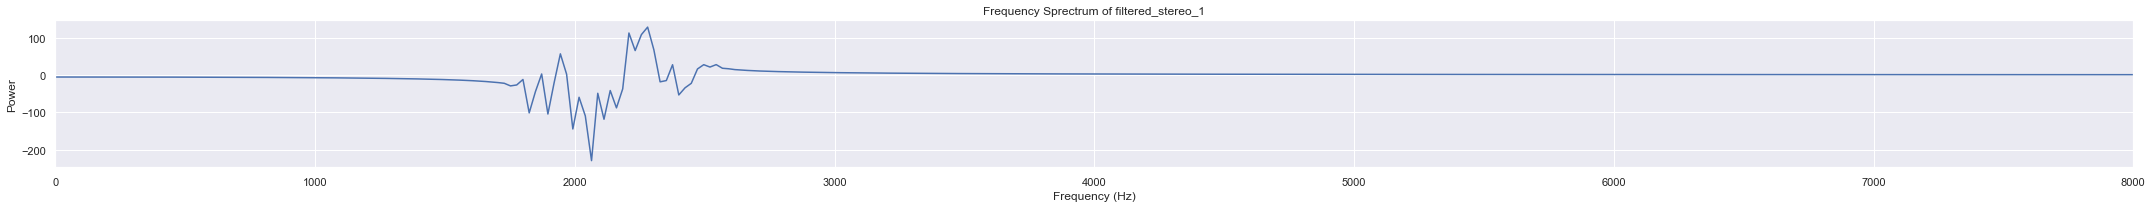

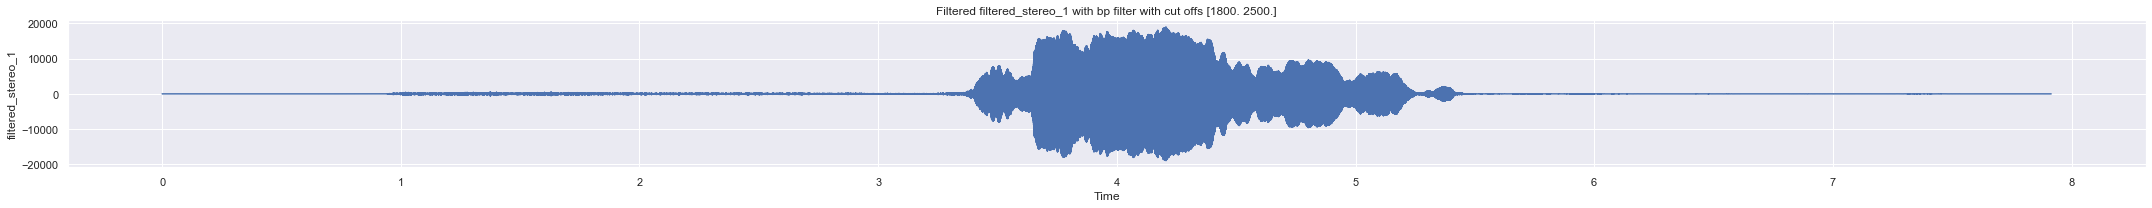

In [12]:
# applying band pass filter of cut offs 1800 - 2500 Hz and visualizing all together
y = filt.apply(data[key], filt_type = 'bp', f_cut = [1800, 2500], order = 10, response = True, plot = True, f_lim = [0, 8000])

In [13]:
# playing filtered sound
sd.play(y.values, fs)
sd.wait()

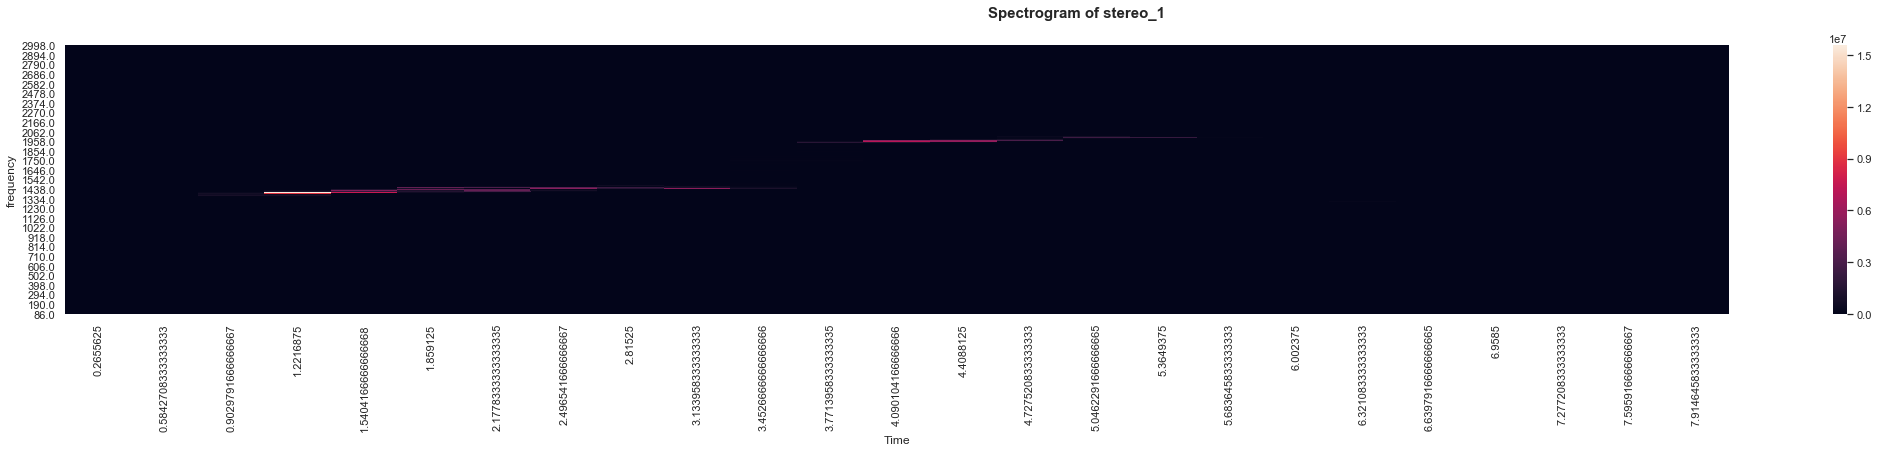

In [15]:
# spectrogram visualization
# visualizing only upto frequency of 1/8 th of nyquest frequency by using vis_freq for clear visualization
msd.get_spectrogram(data['stereo_1'], fs = fs, nperseg = int(fs/2), noverlap = int(fs/5), mode = 'psd', figsize = None, 
                    vis_frac = 1/8, ret_sxx = False, show = True, save = False, saveapth = '', fname = '')

In [16]:
# putting spectrogram data inside a variable
sxx = msd.get_spectrogram(data['stereo_1'], fs = fs, nperseg = int(fs/2), noverlap = int(fs/5), mode = 'psd', figsize = None, 
                          vis_frac = 1, ret_sxx = True, show = False, save = False, saveapth = '', fname = '')
sxx

Time,0.2655625,0.5842708333333333,0.9029791666666667,1.2216875,1.5404166666666668,1.859125,2.1778333333333335,2.496541666666667,2.81525,3.133958333333333,...,5.0462291666666665,5.3649375,5.683645833333333,6.002375,6.321083333333333,6.6397916666666665,6.9585,7.277208333333333,7.595916666666667,7.914645833333333
frequency,,,,,,,,,,,,,,,,,,,,,
0.0,1.261135e-06,5.507858e-03,3.265506e+00,1.129773e-01,1.662119e+00,9.685559e+00,1.593338e-01,1.710303e+01,2.859658e+00,3.256948e+00,...,9.248174e-01,6.681140e-01,5.822909e-02,3.845392e-02,3.258298e-03,2.449073e-04,4.447201e-04,0.000642,7.323984e-04,1.888696e-05
2.0,1.224390e-04,4.544379e-04,1.251300e-01,3.944053e-03,7.973333e-02,4.622137e-01,7.752294e-04,6.685874e-01,7.733741e-02,1.127660e-01,...,2.491769e-02,3.714965e-02,8.005752e-04,4.087907e-04,5.994817e-04,9.597273e-05,2.477531e-04,0.000084,3.068085e-05,3.561058e-04
4.0,7.063419e-04,8.591840e-05,8.803559e-02,5.006673e-03,1.634302e-02,2.452654e-01,5.198694e-03,6.048549e-01,9.314574e-02,9.397909e-02,...,7.101929e-02,2.533626e-02,1.221277e-03,2.883448e-03,4.418361e-06,1.106020e-05,5.693638e-05,0.000010,2.504752e-05,3.045737e-04
6.0,3.796641e-04,5.913934e-04,7.184774e-02,1.507422e-02,1.862076e-02,2.015850e-01,2.503722e-02,2.601104e-01,6.792576e-02,5.544822e-02,...,1.991451e-02,9.036890e-03,1.795385e-03,1.641555e-03,1.292964e-04,1.766307e-05,1.051994e-04,0.000106,4.958416e-05,2.416588e-04
8.0,9.243689e-05,5.089300e-04,3.849852e-02,1.708162e-03,2.154565e-02,7.480086e-02,5.296799e-03,1.260173e-01,6.105132e-02,5.832557e-02,...,1.040574e-02,1.302600e-02,3.000407e-03,3.684118e-04,2.462086e-05,5.545197e-05,5.489210e-05,0.000006,2.128453e-06,4.835853e-04
10.0,9.140046e-05,1.349241e-04,1.380293e-02,7.016878e-03,4.518067e-02,8.819578e-02,4.454518e-03,6.041147e-02,1.495250e-02,1.933791e-02,...,4.657719e-03,8.817878e-03,9.654353e-04,2.204640e-05,1.421691e-04,4.163079e-05,1.009438e-05,0.000094,2.503028e-06,8.985451e-05
12.0,1.414650e-04,3.928190e-05,2.541049e-03,3.002461e-03,2.580172e-02,2.879811e-02,2.772810e-03,3.723850e-02,2.130904e-03,2.176174e-04,...,3.967833e-03,1.152072e-04,2.931629e-04,1.902481e-04,6.197197e-04,6.251545e-05,3.424734e-05,0.000116,1.781863e-04,2.056850e-04
14.0,4.532324e-04,1.660407e-04,2.235312e-03,3.457877e-03,7.884593e-03,1.023834e-03,3.003439e-03,3.678405e-04,6.896187e-03,3.223001e-03,...,5.894098e-03,6.013011e-04,6.516351e-05,3.344404e-04,2.214305e-04,3.069632e-05,4.710198e-05,0.000061,4.917766e-06,5.910802e-05
16.0,3.669109e-04,1.921172e-04,3.680466e-04,5.912531e-04,1.807685e-02,1.036328e-02,2.156322e-03,1.308286e-03,9.016442e-03,1.360673e-03,...,2.030740e-03,7.204113e-04,2.225445e-04,3.162948e-04,5.684190e-05,9.358340e-05,1.007619e-04,0.000030,2.210716e-04,1.518271e-03
